<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simpson’s Rule

#### Computing Integrals in Python

approximate $\int_{0}^{𝜋} sin(x) dx$ for 11 equally spaced points.

In [ ]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


<ipython-input-2-be5334776da1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


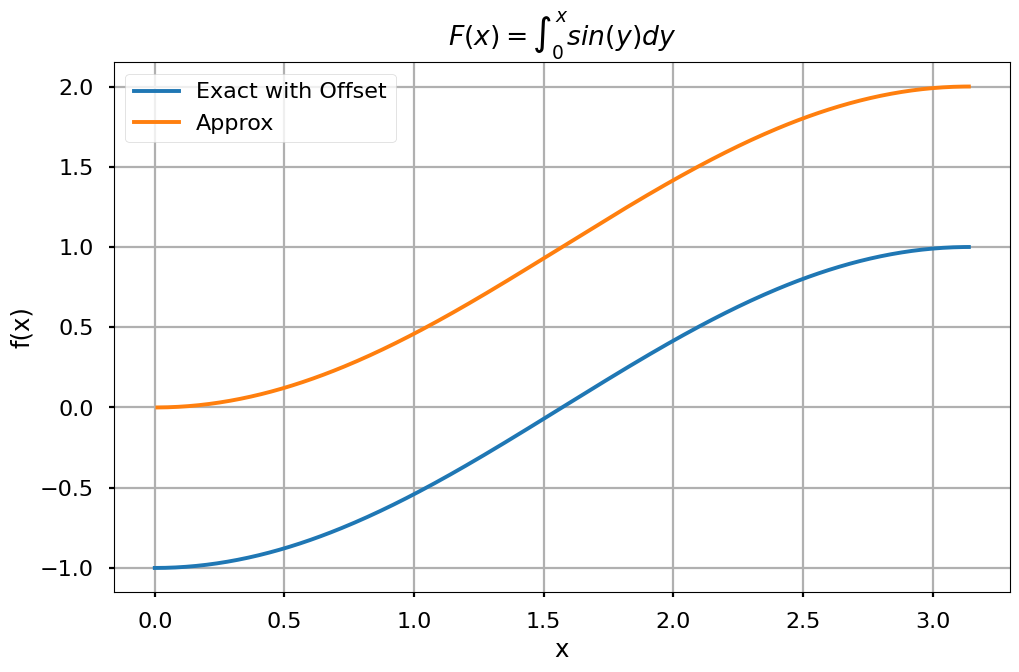

In [ ]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

#### Simpson’s Rule

Simpson's Rule is a method for approximating the integral of a function by using quadratic polynomials to estimate the area under the curve over pairs of subintervals. It fits a quadratic polynomial through three points: the ends of each subinterval and the midpoint between them. This method is based on the assumption that a quadratic polynomial can more accurately represent the function's behavior over the interval than a straight line.

The core of Simpson's Rule involves constructing these quadratic polynomials using Lagrange polynomials and then integrating these polynomials exactly over each pair of subintervals. The integral over two consecutive subintervals is approximated by $\frac{h}{3}$ times the sum of the function values at the ends of these subintervals and four times the function value at the midpoint, where h is the width of the subintervals.

For an even number of equally spaced subdivisions (or an odd number of points) across the interval $[a,b]$, with each subinterval having a width of h, Simpson's Rule approximates the integral of a function $f(x)$ as follows: $\int_{a}^{b} f(x) dx ≈ \frac{h}{3} [f(x_0)+2\sum_{i=1}^{n/2-1} f(x_{2i})+4\sum_{i=1}^{n/2} f(x_{2i-1})+f(x_n)]$.

$x_0,x_1,...x_n$ are the points dividing the interval $[a,b]$ into n equal parts.
$h=\frac{b-a}{n}$ is the width of each subinterval.

The coefficients 1, 4, and 2 alternately weight the function values at the endpoints, midpoints, and interior even-indexed points, respectively.


$f(x)=sin(x)$ over the interval $[0,π]$ using 11 evenly spaced grid points. Simpson's Rule is a method for numerical integration that approximates the area under a curve by fitting a quadratic polynomial through every three adjacent points on the function and then integrating this polynomial exactly.

In [ ]:
import numpy as np

# Define the function to be integrated and the interval
f = lambda x: np.sin(x)
a = 0
b = np.pi
n = 11  # Ensure n is odd for Simpson's Rule
h = (b - a) / (n - 1)

# Generate the grid points
x = np.linspace(a, b, n)

# Apply Simpson's Rule
I_simp = (h/3) * (f(x[0]) + 2 * np.sum(f(x[2:n-1:2])) + 4 * np.sum(f(x[1:n:2])) + f(x[-1]))

# Exact value of the integral
exact_value = 2

# Display the results
print(f"Simpson's Rule Approximation: {I_simp}")
print(f"Exact Value: {exact_value}")

# Calculate the error
error = exact_value - I_simp

# Display the error
print(f"Error: {error}")



Simpson's Rule Approximation: 2.0001095173150043
Exact Value: 2
Error: -0.00010951731500430384


The approximation obtained from Simpson's Rule is remarkably close to the exact value of the integral, with a very small error of approximately -0.00011. This showcases Simpson's Rule as a highly accurate method for numerical integration, especially when compared to simpler methods like the Trapezoid Rule or Riemann sums. The negative sign of the error indicates a slight overestimation by the Simpson's Rule approximation in this case.